In [ ]:
import pandas as pd
import shap
from joblib import load
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
run_time_pred = pd.read_csv('../data/predicted_running_times_xgboost_convlstm.csv')
dwell_time_pred = pd.read_csv('../data/predicted_dwell_times_xgboost_convlstm.csv')

In [7]:
dwell_time_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17189 entries, 0 to 17188
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 17189 non-null  int64  
 1   trip_id                    17189 non-null  int64  
 2   deviceid                   17189 non-null  int64  
 3   direction                  17189 non-null  int64  
 4   bus_stop                   17189 non-null  int64  
 5   date                       17189 non-null  object 
 6   arrival_time               17189 non-null  object 
 7   departure_time             17189 non-null  object 
 8   dwell_time                 17189 non-null  object 
 9   dwell_time_in_seconds_old  17189 non-null  float64
 10  day_of_week                17189 non-null  int64  
 11  time_of_day                17189 non-null  float64
 12  Sunday/holiday             17189 non-null  int64  
 13  saturday                   17189 non-null  int

In [3]:
run_time_pred.columns, dwell_time_pred.columns

(Index(['Unnamed: 0', 'trip_id', 'deviceid', 'direction', 'segment', 'date',
        'start_time', 'end_time', 'run_time', 'run_time_in_seconds', 'length',
        'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday',
        'weekday/end', 'week_no', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'rt(t-1)',
        'rt(t-2)', 'rt(n-1)', 'rt(n-2)', 'rt(n-3)', 'hour_of_day', 'day',
        'month', 'temp', 'precip', 'windspeed', 'max_elevation',
        'avg_elevation', 'total_poi_count', 'average_poi_distance',
        'segment_gradient_average', 'stop_to_stop_gradient',
        'significant_bend_count', 'conditions', 'convlstm', 'XGBoost',
        'meta_lr', 'meta_rr'],
       dtype='object'),
 Index(['Unnamed: 0', 'trip_id', 'deviceid', 'direction', 'bus_stop', 'date',
        'arrival_time', 'departure_time', 'dwell_time',
        'dwell_time_in_seconds_old', 'day_of_week', 'time_of_day',
        'Sunday/holiday', 'saturday', 'weekday/end', 'week_no', 'dt(w-1)',
        'dt(w-2)', 'dt(w-3)'

In [3]:
run_meta_rf = load('../models/running_time_metalearner.joblib')

dwell_meta_rf = load('../models/dwell_time_metalearner.joblib')

In [4]:
run_importance = run_time_pred[['convlstm','XGBoost']]
dwell_importance = dwell_time_pred[['convlstm','XGBoost']]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


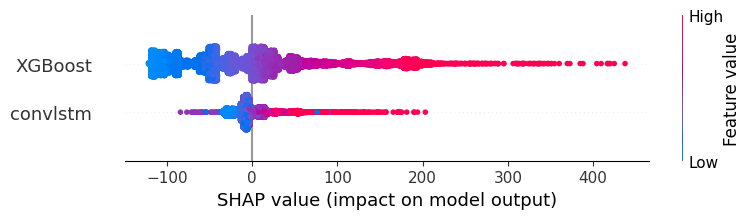

In [6]:
## Running time meta learner - Random Forest
run_rf_explainer = shap.Explainer(run_meta_rf)
run_rf_shap_values = run_rf_explainer.shap_values(run_importance)
shap.summary_plot(run_rf_shap_values, run_importance,color=plt.get_cmap("RdBu"))

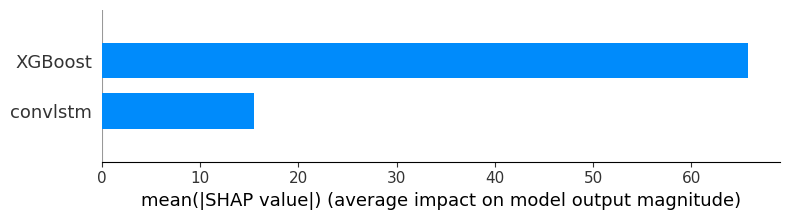

In [8]:
shap.summary_plot(run_rf_shap_values, run_importance,plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


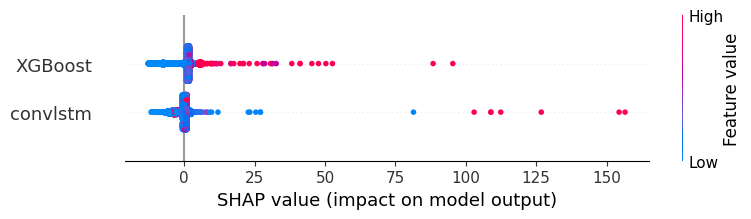

In [15]:
## Dwell time meta learner - Random Forest
dwell_rf_explainer = shap.Explainer(dwell_meta_rf)
dwell_rf_shap_values = dwell_rf_explainer.shap_values(dwell_importance)
shap.summary_plot(dwell_rf_shap_values, dwell_importance,color=plt.get_cmap('PiYG'))

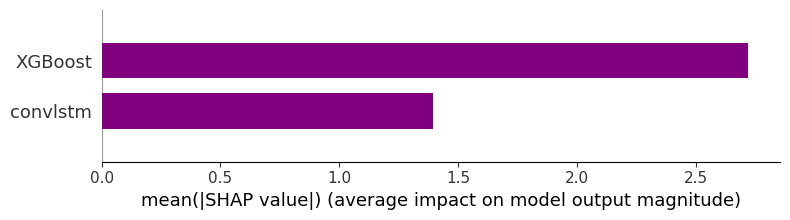

In [17]:
shap.summary_plot(dwell_rf_shap_values, dwell_importance,color='purple',plot_type = 'bar')